# Student Grade Prediction Models: Multiple Regression and Classification

**Objective:** Prediction of the final grade of Portugese secondary education students using Regression and classification machine learning models.

# Import Libraries

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.output_wrapper .output {overflow-y: visible;height: fit-content;}</style>"))

In [2]:
# Importing required libraries.
import pandas as pd # Importing pandas
import numpy as np # Importing numpy
import seaborn as sns #Importing Seaborn for data visualisation
import matplotlib.pyplot as plt #Importing matplotlib for data visualisation
from sklearn.preprocessing import OrdinalEncoder,StandardScaler, LabelEncoder# Importing Ordinal encoder to encode the categorical data
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier# Importing random forest regression
from sklearn.preprocessing import MinMaxScaler # Importing to do standardisation
from sklearn.model_selection import train_test_split #Importing to split our data for training
from sklearn.model_selection import cross_val_score,RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score,confusion_matrix, classification_report,mean_squared_error
from collections import Counter 
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline 
sns.set(color_codes=True)

In [3]:
from eda_module import * #Importing the eda_module
global studentDataSet
studentDataSet = getDataSet()
data = studentDataSet

# Exploratory Data Analysis

# Data Mining 

In [4]:
# Calling the EDA function from EDA module
dataInfo()

Checking the shapes of the Maths data set : (395, 33)
Columns
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Checking the info of Maths dataset None
Checking the shapes of the Portuguese data set : (649, 33)
Columns
 Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Checking the info of Maths dataset None
Merging the 2 datas

In [5]:
#Statistics Details
#Calling the function from EDA module
statistics(studentDataSet)

,Mean,Std,Minimum,First quartile,Median,Third quartile,Maximum,Skew,Kurtosis
Age,16.8127,1.2682,15.0,16.0,17.0,18.0,22.0,0.422084,-0.031293
Mother education,2.4924,1.1301,0.0,2.0,2.0,4.0,4.0,-0.006391,-1.254753
Father education,2.2931,1.0932,0.0,1.0,2.0,3.0,4.0,0.233855,-1.088070
Travel time,1.5650,0.7422,1.0,1.0,1.0,2.0,4.0,1.253308,1.164596
Study time,1.9275,0.8268,1.0,1.0,2.0,2.0,4.0,0.698354,0.039527
Failures,0.3323,0.7155,0.0,0.0,0.0,0.0,3.0,2.363761,5.113053
Family relation,3.9381,0.9412,1.0,4.0,4.0,5.0,5.0,-1.107387,1.416695
Free time,3.1843,1.0598,1.0,3.0,3.0,4.0,5.0,-0.189793,-0.431887
Go out,3.1722,1.1610,1.0,2.0,3.0,4.0,5.0,-0.002315,-0.833895
Daily alcohol,1.5045,0.9259,1.0,1.0,1.0,2.0,5.0,2.121290,4.231877


# Data Visualization

/Users/devipriya/Downloads/Student Grade Prediction/eda_module.py:205: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax)


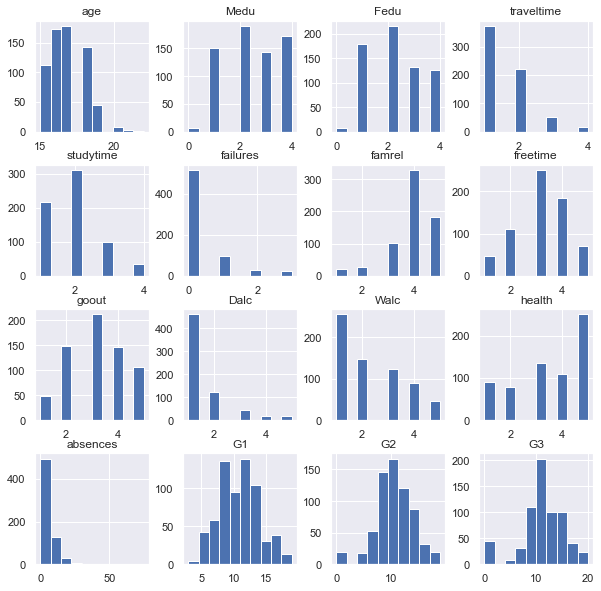

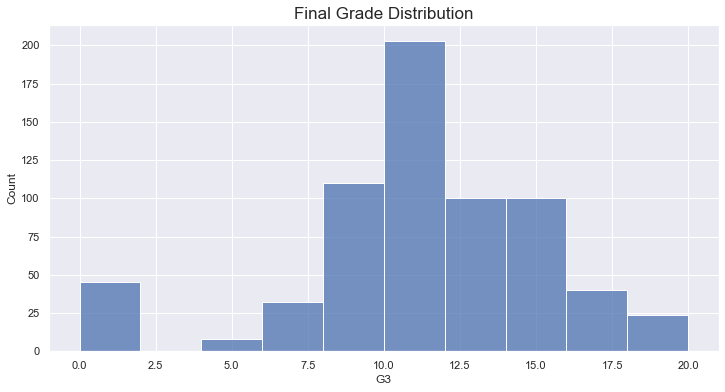

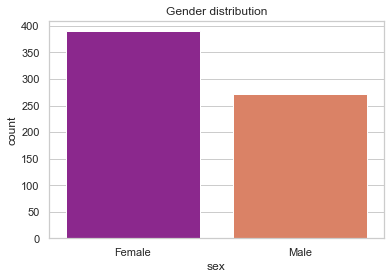

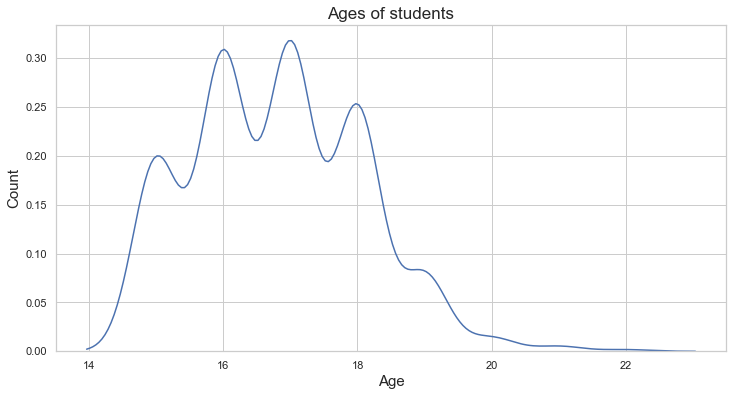

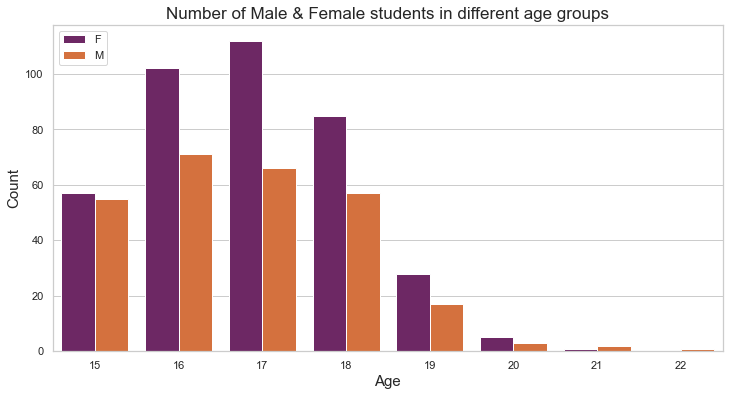

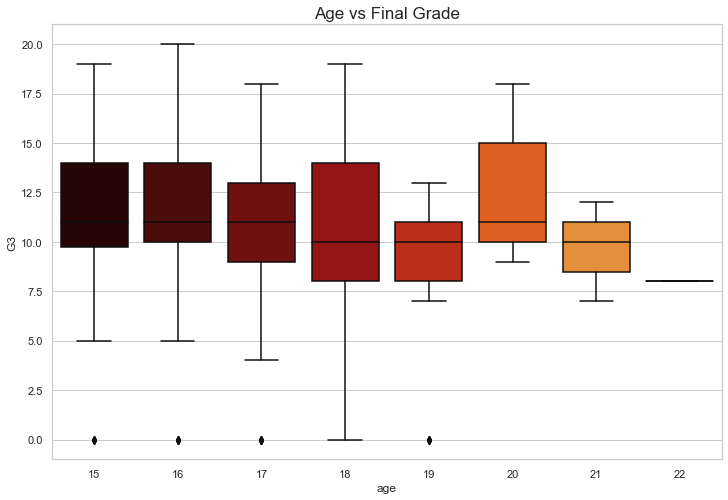

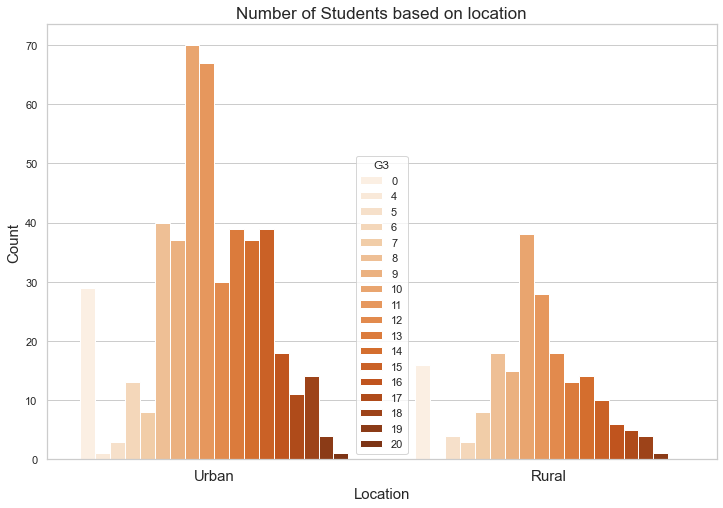

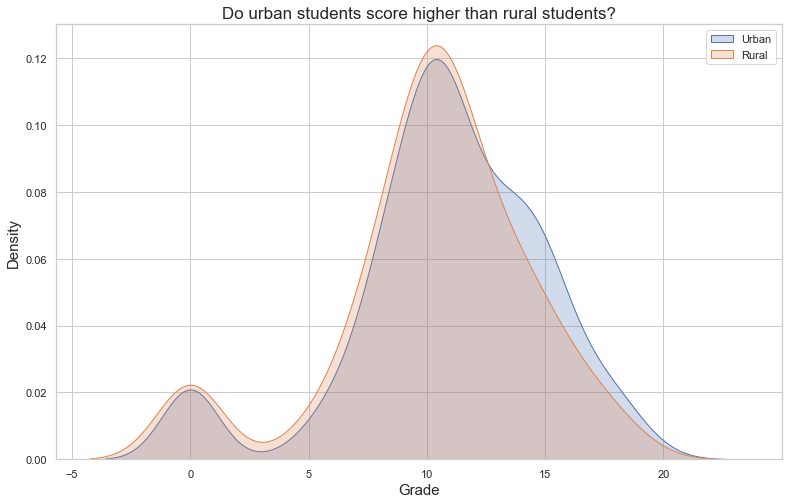

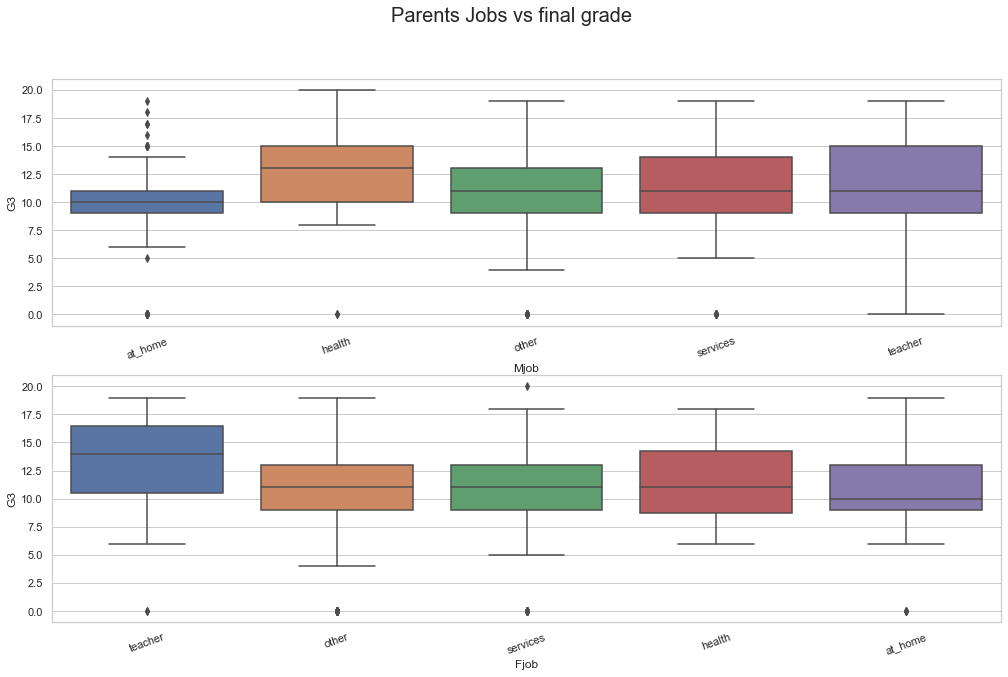

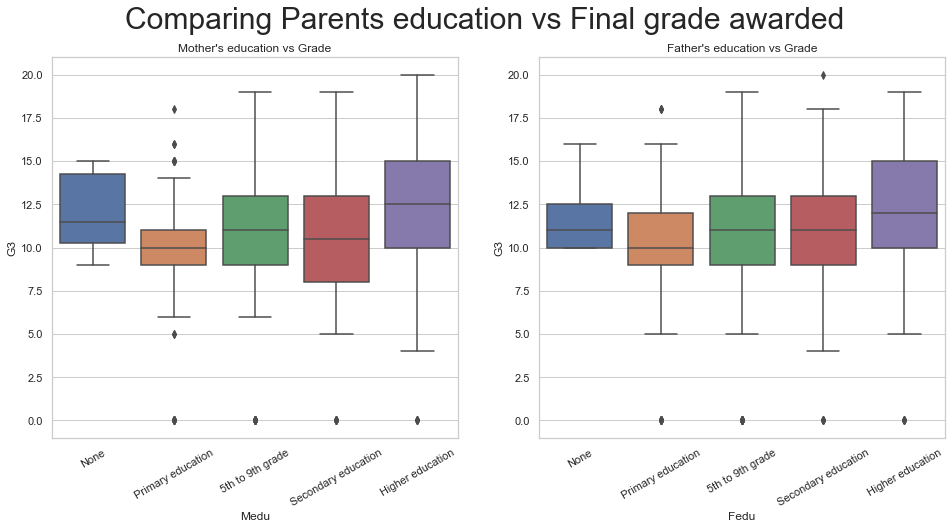

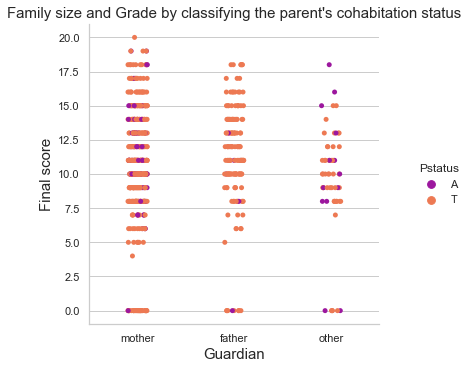

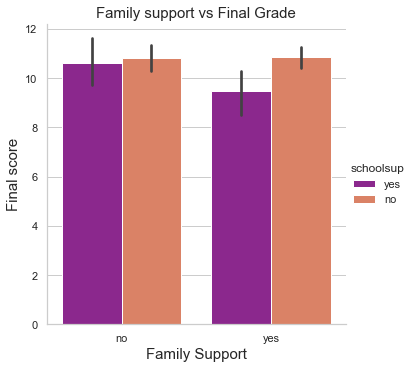

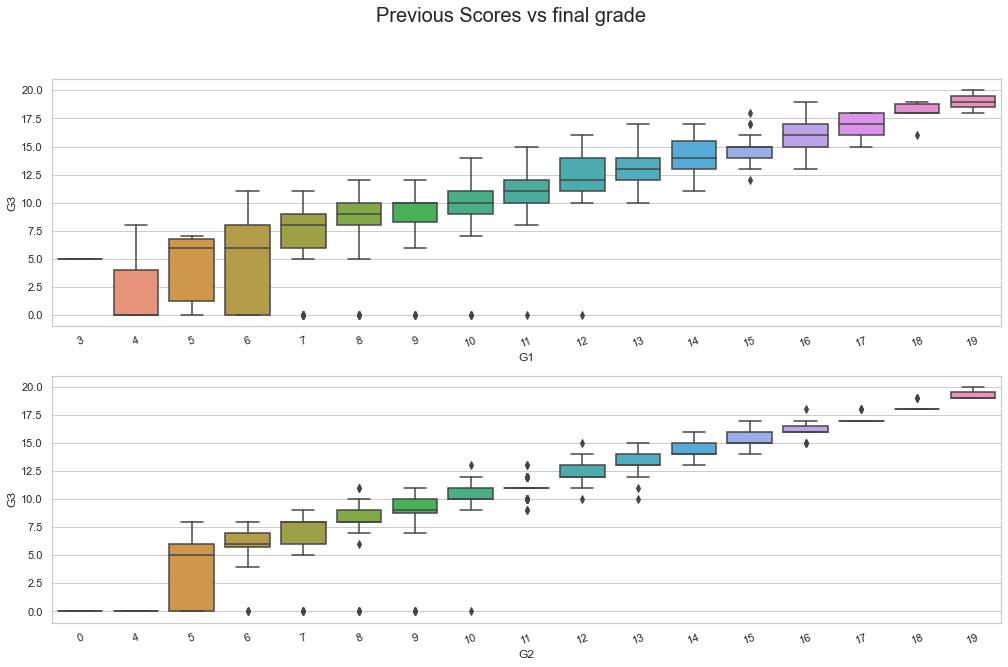

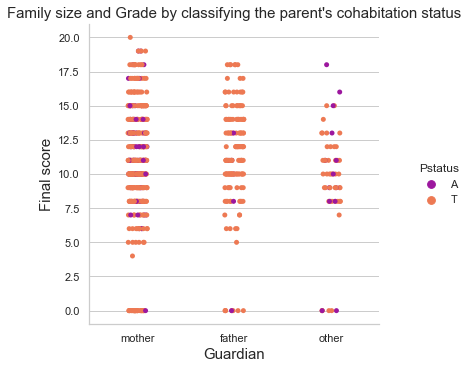

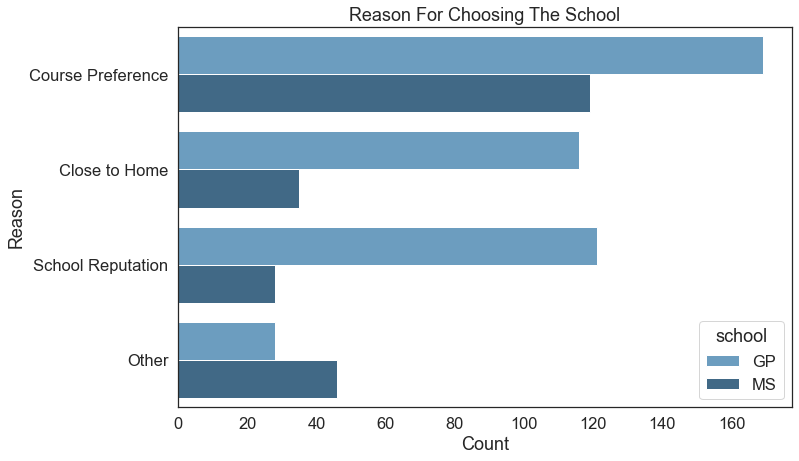

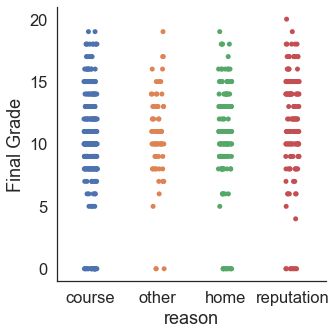

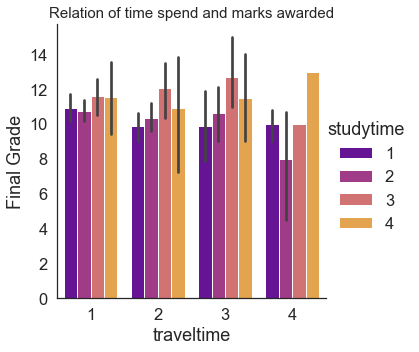

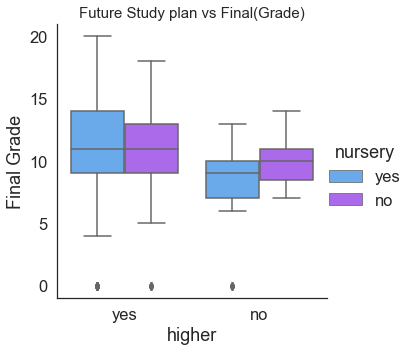

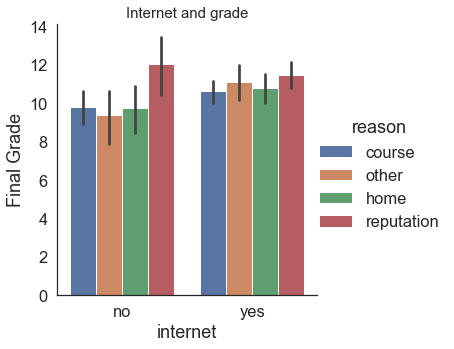

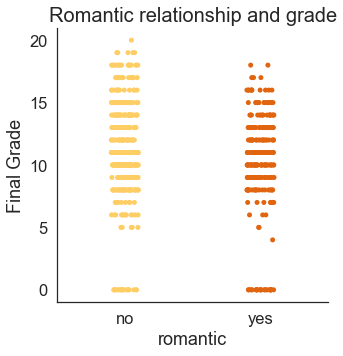

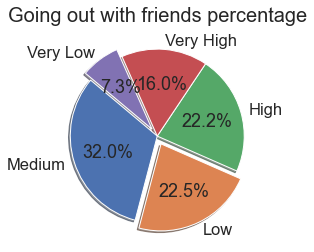

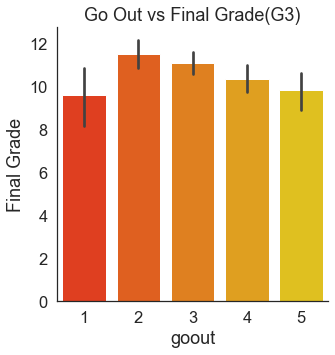

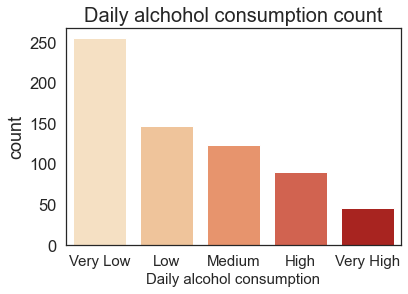

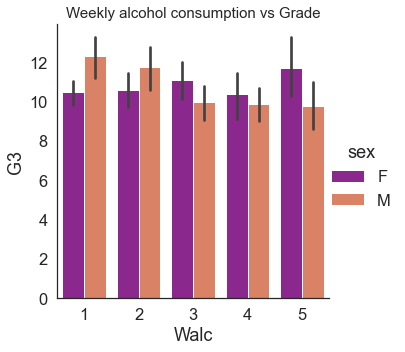

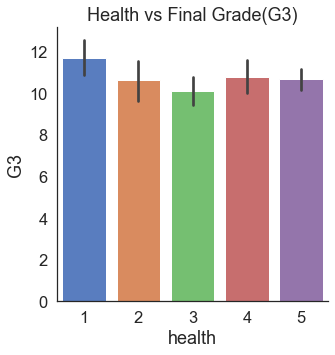

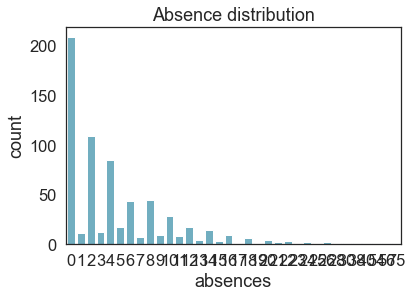

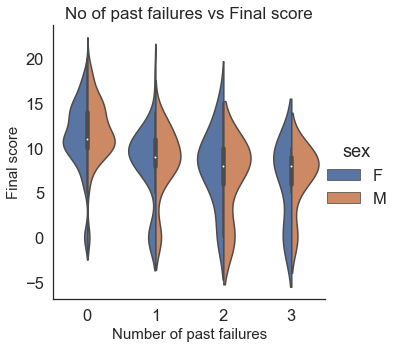

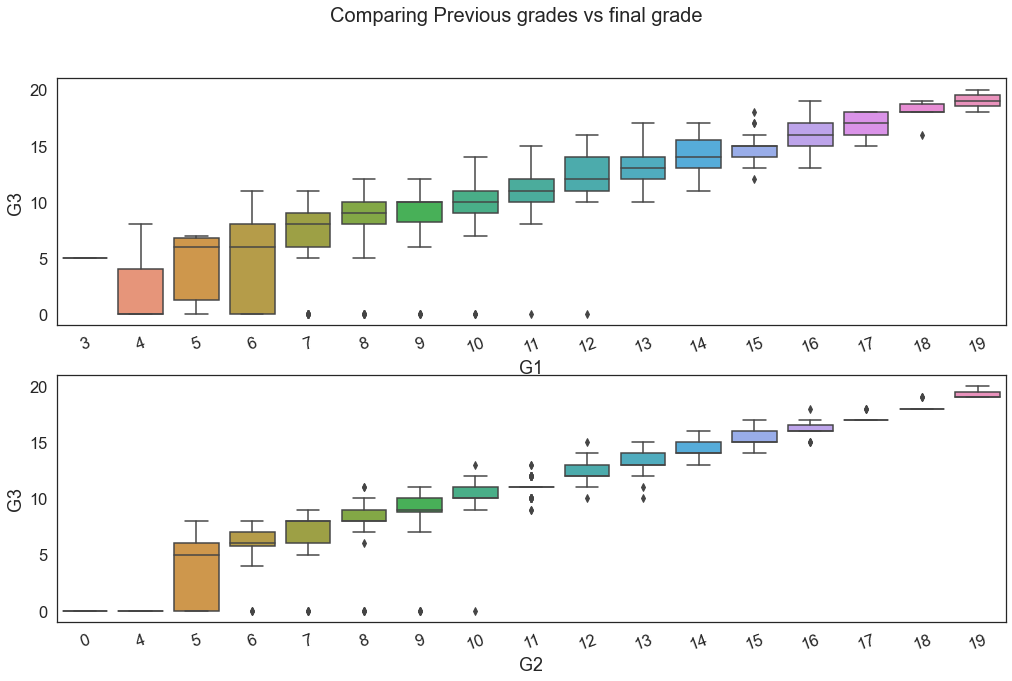

In [6]:
#Calling the function to show all the data visualization
plotMain(studentDataSet)

# Checking Collinearity

G3            1.000000
G2            0.913548
G1            0.796569
Medu          0.182611
Fedu          0.137159
studytime     0.097863
famrel        0.061296
absences     -0.004601
health       -0.047812
freetime     -0.058860
traveltime   -0.073488
Dalc         -0.075212
goout        -0.081691
Walc         -0.084689
age          -0.127446
failures     -0.359377
Name: G3, dtype: float64 




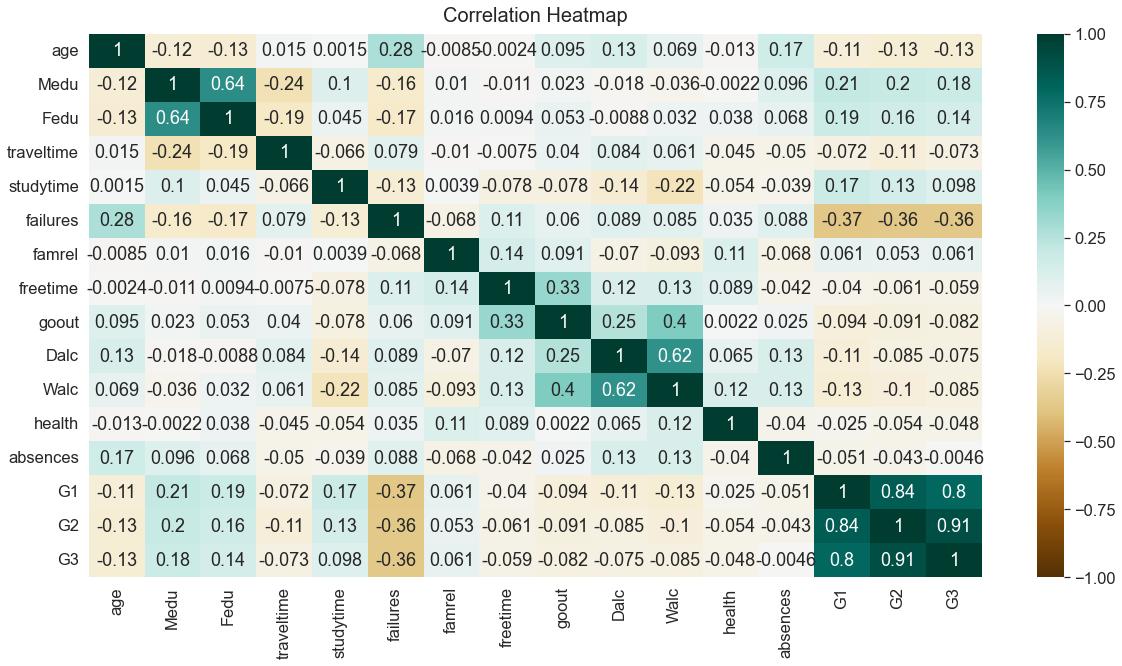

In [7]:
#Checking the co-relation matrix
checkCorrelation(studentDataSet)

# Common Functions

In [8]:
#Function to divide the data into dependent& independent variable
def divideDependentNIndependent(studentDataSet):
    # Set Dependent and independent variables
    explanatoryVariables = studentDataSet.drop(['G3'], axis=1) # features
    target = studentDataSet['G3']# target feature
    return explanatoryVariables,target

In [9]:
#Function to transform categorical to numbers
def transformCategorical(explanatoryVariables):
    df = explanatoryVariables
    df= df[['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid',
        'activities','nursery','higher','internet','romantic']]
    X_train__ = df 
    #Using Ordinalencoder to encode the categorical variables
    oe = OrdinalEncoder()
    oe.fit(X_train__)
    X_train_enc = oe.transform(X_train__).astype(int)
   #Adding coulmns to make the numpyarray to dataframe
    df = pd.DataFrame(X_train_enc, columns = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid',
        'activities','nursery','higher','internet','romantic'])
    #Removing the current categorical columns of the explonatory variable set
    tempDataSet = explanatoryVariables.drop(['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid',
        'activities','nursery','higher','internet','romantic'], axis = 1)    
    # merging the new numerical data set with temporary dataset
    dataSet= pd.merge(tempDataSet,df,  right_index=True, left_index=True)
    #Reindex the column to make it as older index
    column_names = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2']
    dataSet = dataSet.reindex(columns=column_names)
    return dataSet

In [10]:
#Standardisation
def scalerFn(x_train,x_test):
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test  = scaler.transform(x_test)   
    return x_train,x_test

In [11]:
#Spliting train and test set for machine learning
def trainNtest(X,target):
    X_train, X_test, y_train, y_test = train_test_split(X,target,train_size=0.77)# The dataset is divided into 70 and 30
    x_train,x_test = scalerFn(X_train, X_test)
    return x_train,x_test,y_train,y_test

In [12]:
#Function to find the cross validation score
def crossValidationScore(model,x,y):
    scores = cross_val_score(model, x, y, cv=5)
    print("Accuracy cross validation :",round(scores.mean()*100,2),"%")

In [13]:
#Function to do hypertuning using gridSearchCV
def tuningUsinggridSearchCv(model_name,param_grid,X_train,y_train):
    gridsearch = GridSearchCV(model_name, param_grid, cv = 3, verbose=0, n_jobs = -1)
    model = gridsearch.fit(X_train,y_train)
    return model.best_estimator_

In [14]:
#Function to do hypertuning using randomSearchCV
def tuningUsingRandomSearchCv(model_name,param_grid,X_train,y_train):
    random = RandomizedSearchCV(estimator = model_name, param_distributions = param_grid, cv = 3, verbose=0, n_jobs = -1)
    model = random.fit(X_train,y_train)
    return model.best_estimator_

In [15]:
#Function to evaluate the model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    modelAccuracy = model.score(X_test, y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print("Accuracy ({}): {:.2f}%".format(text, modelAccuracy*100))  
    return accuracy

In [16]:
# Function to evaluate the accuracy of the model
def evaluate_model(model, class_balance,X_test, y_test):
    modelAccuracy = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, modelAccuracy*100))

In [17]:
def prediction_model(model,class_balance,X_test,y_test):
    y_pred = model.predict(X_test)
    c_matrix =confusion_matrix(y_test,y_pred)
    clr = classification_report(y_test,y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(c_matrix,annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value")
    plt.title("Confusion matrix")
    plt.show()
    print(clr)

In [18]:
# Function to plot the feature importance graph
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(15,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [19]:
# Function to categorise the target variable
def categoriseTarget(data):
    #classification – fail is less than 9
    cat = (0, 9, 14, 21)
    cat_name = ['Fail','Good','High']
    data['G3']= pd.cut(data['G3'], bins= cat, labels= cat_name,include_lowest=True)
    student_grade_class = LabelEncoder()
    data['G3']=student_grade_class .fit_transform(data['G3'])
    return data['G3']

In [20]:
#Function to check class imbalance by plotting the target
def checkingImbalance(target):    
    b=sns.countplot(x=target, 
                       facecolor=(0, 0, 0, 0),
                       linewidth=5,
                       edgecolor=sns.color_palette("dark", 3))
    plt.xlabel('Y-train',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.title('Y-train distribution plot')
    x_labels = ['Fail','Good','High']
    b.set_xticklabels(x_labels,fontsize=12)
# checkingImbalance(targetVariable)

In [21]:
#Function to create sample using SMOTE
def applySmote(X_train,y_train):
#     using Counter to display results of naive oversampling
    x, y = SMOTE().fit_resample(X_train, y_train) 
    return x, y

In [22]:
#Function to create sample using Random undersampler
def applyRandomSampler(x,y):
    ros = RandomUnderSampler(random_state=0)
    x, y = ros.fit_resample(x, y)
    return x, y

# Data Preprocessing

In [23]:
# The data is divided to explanatory and target variables
explanatoryVariables,target = divideDependentNIndependent(studentDataSet)

In [24]:
# Checking first 5 view observations of explanatoryVariables
explanatoryVariables.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,4,3,4,1,1,3,6,5,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,5,3,3,1,1,3,4,5,5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,4,3,2,2,3,3,10,7,8
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,3,2,2,1,1,5,2,15,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,4,3,2,1,2,5,4,6,10


In [25]:
# Checking first 5 view observations of target variables
target.head()

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [26]:
# Transform the categorical explanatory variables to numerical
x = transformCategorical(explanatoryVariables)
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


# Regression

In [27]:
# FUnction of randomforest model
def randomForestRegressionModel(x,y):
    X_train,X_test,y_train,y_test = trainNtest(x,y)#After scaling and spliting
    rf = RandomForestRegressor()
    random_grid = {
                   'max_depth': [10, 20, 30, 50, 60, 70, 80,90,100, None],
                   'min_samples_leaf': [1, 2, 4],
                   'min_samples_split': [2, 5, 10],
                   'n_estimators': [100,130,150, 180, 200],
                   'random_state':[0,15,42]
                    }
    rf_random = tuningUsingRandomSearchCv(rf, random_grid,X_train,y_train)
    # Fit the random search model
    model = rf_random.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('R2 value  : ',round(r2_score(y_test, y_pred),2))
    Adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y)-1)/(len(y)-x.shape[1]-1)
    print('Adjusted r2 : ', round(Adj_r2,2))
    y_true = y_test
    y_pred = y_pred
    modelAccuracy = model.score(X_test, y_test)
    print('Mean Squared Error:', round(mean_squared_error(y_test, y_pred),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
    print('Accuracy :',round(modelAccuracy,2))
    x_axis = y_pred
    y_axis = y_test - y_pred
    sns.residplot (x=y_pred, y=(y_test - y_pred), lowess = True)
    plt.title( 'Residual Plot' )
    plt.xlabel('Predicted G3')
    plt.xticks(rotation=90)
    plt.ylabel ( 'Residuals')
    # get importance
    plot_feature_importance(model.feature_importances_,explanatoryVariables.columns,'RANDOM FOREST ')

R2 value  :  0.81
Adjusted r2 :  0.8
Mean Squared Error: 2.95
Mean Absolute Error: 0.98
Root Mean Squared Error: 1.72
Accuracy : 0.81


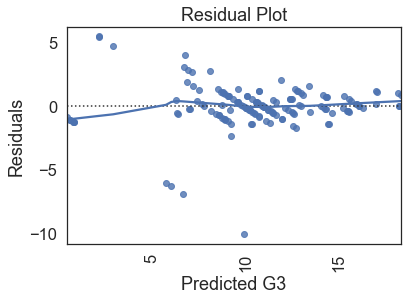

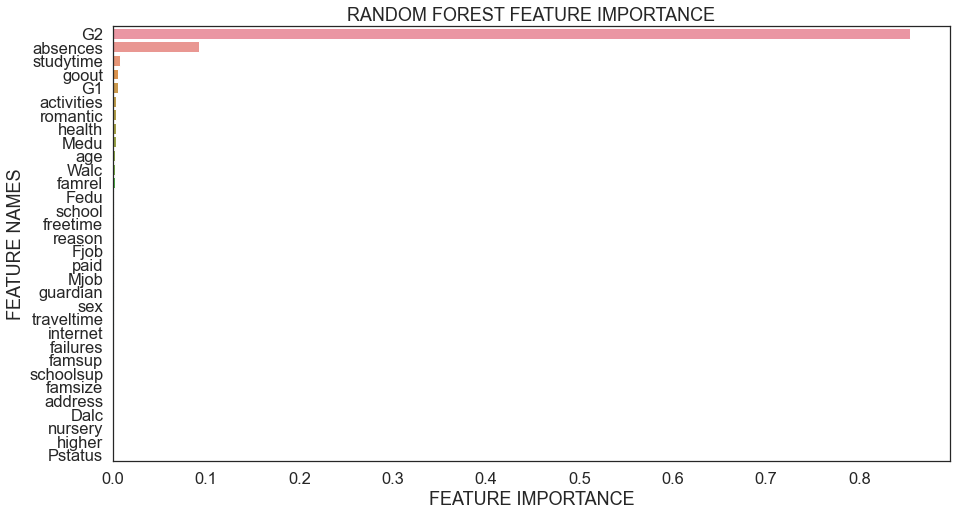

In [28]:
# Calling the model
y_pred = randomForestRegressionModel(x,target)

# Classification

Let's categorise the G3 variable into 3 different categories based on the grade awarded

In [29]:
#Checking the first 5 entries of x to confirm the values are changed to numerical
x.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


In [30]:
#View first 5 entries
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [31]:
#The Y is categorising to specific group
y = categoriseTarget(data)

In [32]:
y

0      0
1      0
2      1
3      2
4      1
      ..
657    0
658    2
659    2
660    0
661    1
Name: G3, Length: 662, dtype: int64

In [33]:
X_train,X_test,y_train,y_test = trainNtest(x,y)#Function to split train and test set

# Support Vector Machine

In [34]:
# SVM model creation
from sklearn.svm import SVC
def svmModel(x,y):
    # SVM Model
    svc = SVC(kernel='rbf', C=1, gamma='auto')
    param_grid={'gamma':[1,1.5,2,3.5],'C': [1, 10], 'kernel': ('linear', 'rbf')}
    model = tuningUsinggridSearchCv(svc,param_grid,X_train,y_train)# function used to tune the parameters to find out the best model
    svc_model = model.fit(x,y)
    return svc_model

# # Random Forest Classification

In [35]:
# RandomForestClassifier Model
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint
def randomForestClassifier(X_train,y_train):
    #From Grid search view to tune the model
    rd = RandomForestClassifier()
    param_grid= {'n_estimators': [100,113,150,200],'max_features': ['auto', 'sqrt', 'log2']}
    model=tuningUsinggridSearchCv(rd,param_grid,X_train,y_train)
#     rd = RandomForestClassifier(max_features='log2')
    model = model.fit(X_train,y_train)
    return model

# Multi-Layer Perceptron Neural Networks

In [36]:
#Importing MLPClassifier
def multiLayerPerceptionNeuralNetworksModel(X_train,y_train):
    #Initializing the MLPClassifier
    #Tuned by using GridSearchcv
    mpn = MLPClassifier()
    param = {'hidden_layer_sizes':[150,100,50], 'max_iter': [800],'random_state':[1]}
    mlpmodel = tuningUsinggridSearchCv(mpn,param,X_train, y_train)
    model = mlpmodel.fit(X_train, y_train)#Predicting y for X_val
    return model

# Comparing the models with class imbalanced Data

Evaluating the Svm model for imbalanced data

Accuracy (Imbalanced Data:): 78.43%


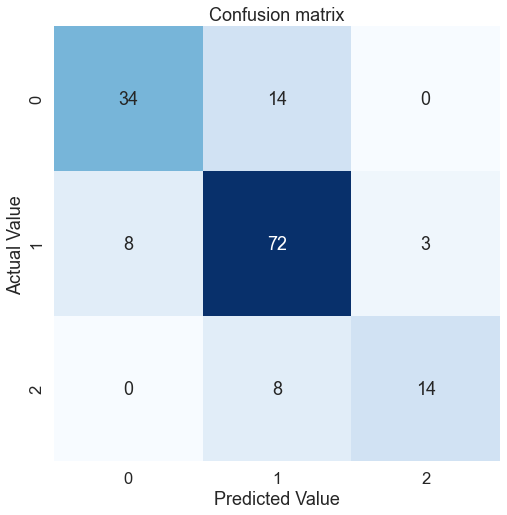

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        48
           1       0.77      0.87      0.81        83
           2       0.82      0.64      0.72        22

    accuracy                           0.78       153
   macro avg       0.80      0.74      0.76       153
weighted avg       0.79      0.78      0.78       153



In [37]:
# Evaluate the svm model for the imbalanced data
model = svmModel(X_train,y_train)
evaluate_model(model,"Imbalanced Data:", X_test,y_test)
prediction_model(model,"Imbalanced Data:",X_test,y_test) 

# Random forest Classification Model

Accuracy (Imbalanced Data:): 82.35%


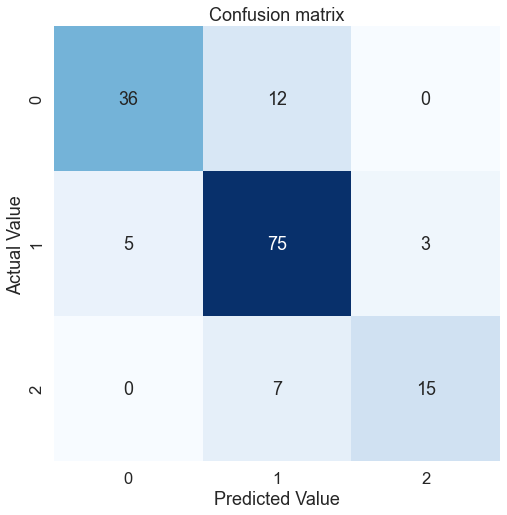

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        48
           1       0.80      0.90      0.85        83
           2       0.83      0.68      0.75        22

    accuracy                           0.82       153
   macro avg       0.84      0.78      0.80       153
weighted avg       0.83      0.82      0.82       153



In [38]:
# Evaluate the svm model for the imbalanced data
model = randomForestClassifier(X_train,y_train)
evaluate_model(model,"Imbalanced Data:", X_test,y_test)
prediction_model(model,"Imbalanced Data:",X_test,y_test) 

# Multi-Layer Perceptron Neural Networks

/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (Imbalanced Data:): 72.55%


/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


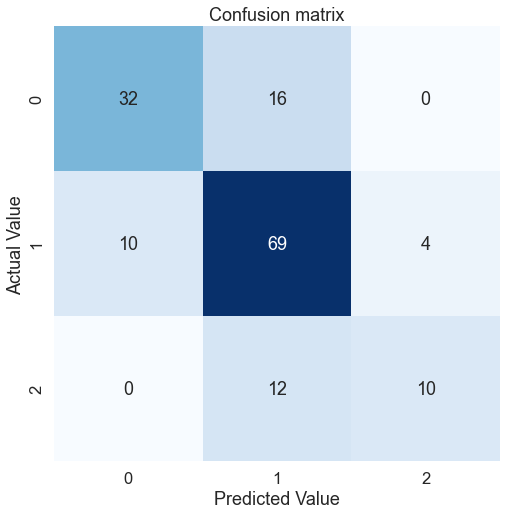

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        48
           1       0.71      0.83      0.77        83
           2       0.71      0.45      0.56        22

    accuracy                           0.73       153
   macro avg       0.73      0.65      0.68       153
weighted avg       0.73      0.73      0.72       153



In [39]:
# Evaluate the svm model for the imbalanced data
model = multiLayerPerceptionNeuralNetworksModel(X_train,y_train)
evaluate_model(model,"Imbalanced Data:", X_test,y_test)
prediction_model(model,"Imbalanced Data:",X_test,y_test) 

# Checking the class Imbalance problem

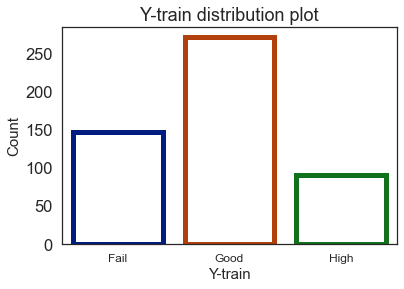

In [40]:
checkingImbalance(y_train)

# SMOTE Oversampler to solve class imbalance issue

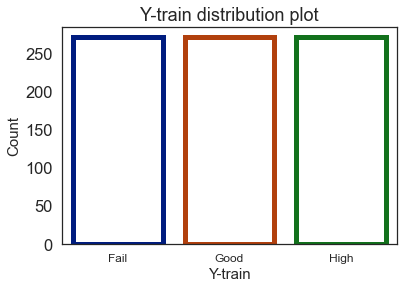

In [41]:
#Applying smote to solve class imbalance issue
x_samp,y_samp =  applySmote(X_train,y_train)
checkingImbalance(y_samp)

# Checking the model with sampled data

# SVM MODEL

Accuracy (After sampling using SMOTE): 74.51%


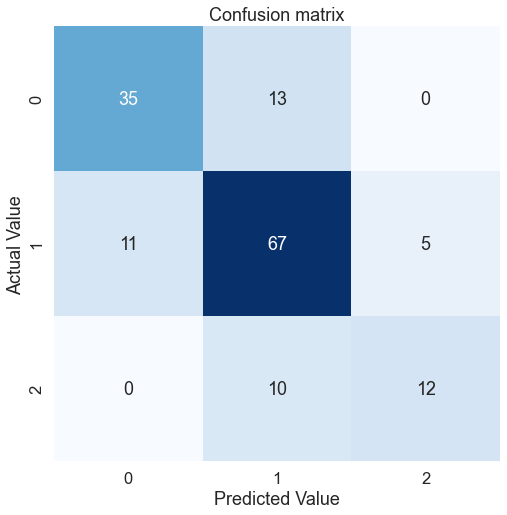

              precision    recall  f1-score   support

           0       0.76      0.73      0.74        48
           1       0.74      0.81      0.77        83
           2       0.71      0.55      0.62        22

    accuracy                           0.75       153
   macro avg       0.74      0.69      0.71       153
weighted avg       0.74      0.75      0.74       153



In [42]:
# Evaluate the svm model for the imbalanced data
model = svmModel(x_samp,y_samp)
evaluate_model(model,"After sampling using SMOTE", X_test,y_test)
prediction_model(model,"After sampling using SMOTE",X_test,y_test) 

# Random forest Classification Model

Accuracy (After sampling using SMOTE): 84.31%


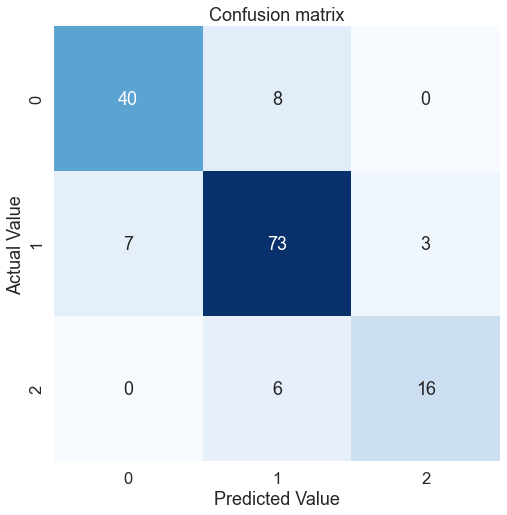

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        48
           1       0.84      0.88      0.86        83
           2       0.84      0.73      0.78        22

    accuracy                           0.84       153
   macro avg       0.84      0.81      0.83       153
weighted avg       0.84      0.84      0.84       153



In [43]:
# Evaluate the svm model for the imbalanced data
model = randomForestClassifier(x_samp,y_samp)
evaluate_model(model,"After sampling using SMOTE", X_test,y_test)
prediction_model(model,"After sampling using SMOTE",X_test,y_test) 

# Multi-Layer Perceptron Neural Networks

/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/devipriya/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (800) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (After sampling using SMOTE): 74.51%


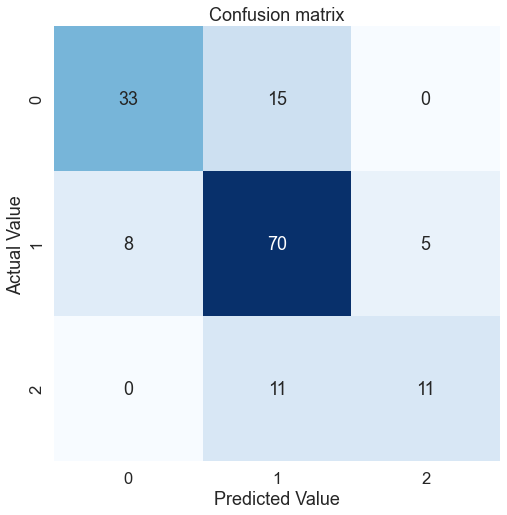

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        48
           1       0.73      0.84      0.78        83
           2       0.69      0.50      0.58        22

    accuracy                           0.75       153
   macro avg       0.74      0.68      0.70       153
weighted avg       0.75      0.75      0.74       153



In [44]:
# Evaluate the svm model for the imbalanced data
model = multiLayerPerceptionNeuralNetworksModel(x_samp,y_samp)
evaluate_model(model,"After sampling using SMOTE", X_test,y_test)
prediction_model(model,"After sampling using SMOTE",X_test,y_test) 

# RandomUnderSampler to solve class imbalance issue

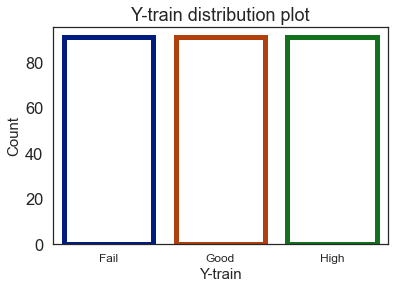

In [45]:
#Applying smote to solve class imbalance issue
x_random,y_random =  applyRandomSampler(X_train,y_train)
checkingImbalance(y_random)

# Checking the model on resampled data

# SVM MODEL

Accuracy (After sampling using Random undersampler): 75.16%


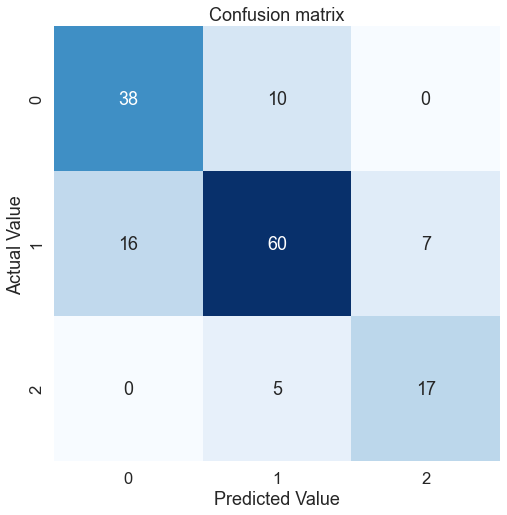

              precision    recall  f1-score   support

           0       0.70      0.79      0.75        48
           1       0.80      0.72      0.76        83
           2       0.71      0.77      0.74        22

    accuracy                           0.75       153
   macro avg       0.74      0.76      0.75       153
weighted avg       0.76      0.75      0.75       153



In [46]:
# Evaluate the svm model for the imbalanced data
model = svmModel(x_random,y_random)
evaluate_model(model,"After sampling using Random undersampler", X_test,y_test)
prediction_model(model,"After sampling using Random undersampler",X_test,y_test) 

# Random Forest Classification Model

Accuracy (After sampling using Random undersampler): 83.01%


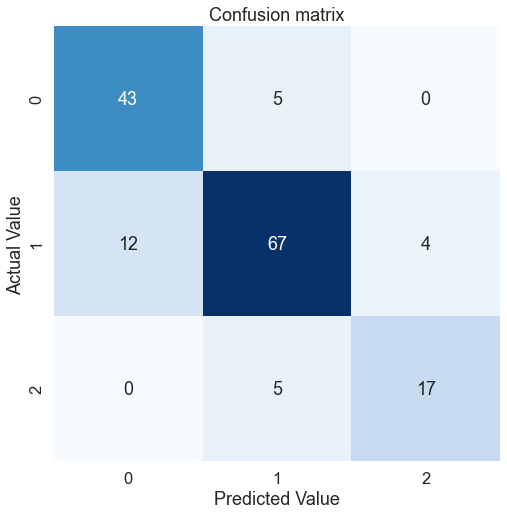

              precision    recall  f1-score   support

           0       0.78      0.90      0.83        48
           1       0.87      0.81      0.84        83
           2       0.81      0.77      0.79        22

    accuracy                           0.83       153
   macro avg       0.82      0.83      0.82       153
weighted avg       0.83      0.83      0.83       153



In [47]:
# Evaluate the svm model for the imbalanced data
model = randomForestClassifier(x_random,y_random)
evaluate_model(model,"After sampling using Random undersampler", X_test,y_test)
prediction_model(model,"After sampling using Random undersampler",X_test,y_test) 

# Multi-Layer Perceptron Neural Networks

Accuracy (After sampling using Random undersampler): 69.93%


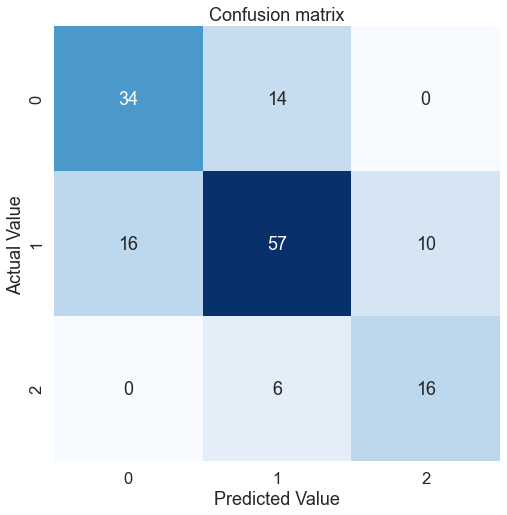

              precision    recall  f1-score   support

           0       0.68      0.71      0.69        48
           1       0.74      0.69      0.71        83
           2       0.62      0.73      0.67        22

    accuracy                           0.70       153
   macro avg       0.68      0.71      0.69       153
weighted avg       0.70      0.70      0.70       153



In [48]:
# Evaluate the svm model for the imbalanced data
model = multiLayerPerceptionNeuralNetworksModel(x_random,y_random)
evaluate_model(model,"After sampling using Random undersampler", X_test,y_test)
prediction_model(model,"After sampling using Random undersampler",X_test,y_test) 